### Importing the required packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### I will start by loading and transforming data to be ready for accurate analysis

#### Importing dataset files and consolidate concerned tables into one table

In [3]:
customers= pd.read_csv(r'olist_customers_dataset.csv')
geolocation= pd.read_csv(r'olist_geolocation_dataset.csv')
Items= pd.read_csv(r'olist_order_items_dataset.csv')
payments= pd.read_csv(r'olist_order_payments_dataset.csv')
reviews= pd.read_csv(r'olist_order_reviews_dataset.csv')
orders= pd.read_csv(r'olist_orders_dataset.csv')
products= pd.read_csv(r'olist_products_dataset.csv')
sellers= pd.read_csv(r'olist_sellers_dataset.csv')
catTrans= pd.read_csv(r'product_category_name_translation.csv')

data=orders.copy()
data=pd.merge(data,customers,on='customer_id')
data=pd.merge(data,reviews,on='order_id')
data=pd.merge(data,Items,on='order_id')
data=pd.merge(data,payments,on='order_id')
data=pd.merge(data,sellers,on='seller_id')
data=pd.merge(data,products,on='product_id')
data=pd.merge(data,catTrans,on='product_category_name')

#### checking for duplicated records

In [4]:
data.duplicated().sum()

0

#### checking for nulls in each column

In [5]:
data.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                             0
review_score                          0
review_comment_title             101808
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0


#### removing all columns with more than 60K missing value then drop all rows with any missing values

In [6]:
data=data.dropna(thresh=60000, axis=1)
data = data.dropna()

# rechecking Nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113193 entries, 0 to 115608
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113193 non-null  object 
 1   customer_id                    113193 non-null  object 
 2   order_status                   113193 non-null  object 
 3   order_purchase_timestamp       113193 non-null  object 
 4   order_approved_at              113193 non-null  object 
 5   order_delivered_carrier_date   113193 non-null  object 
 6   order_delivered_customer_date  113193 non-null  object 
 7   order_estimated_delivery_date  113193 non-null  object 
 8   customer_unique_id             113193 non-null  object 
 9   customer_zip_code_prefix       113193 non-null  int64  
 10  customer_city                  113193 non-null  object 
 11  customer_state                 113193 non-null  object 
 12  review_id                      1131

#### converting date columns into timestamps

In [7]:
data['order_purchase_timestamp']=pd.to_datetime(data['order_purchase_timestamp'], format= '%Y-%m-%d %H:%M:%S')
data['order_approved_at']=pd.to_datetime(data['order_approved_at'], format= '%Y-%m-%d %H:%M:%S')
data['order_delivered_customer_date']=pd.to_datetime(data['order_delivered_customer_date'], format= '%Y-%m-%d %H:%M:%S')
data['order_estimated_delivery_date']=pd.to_datetime(data['order_estimated_delivery_date'], format= '%Y-%m-%d %H:%M:%S')

## EDA section

#### 1-exploring orders over time (count,amount)

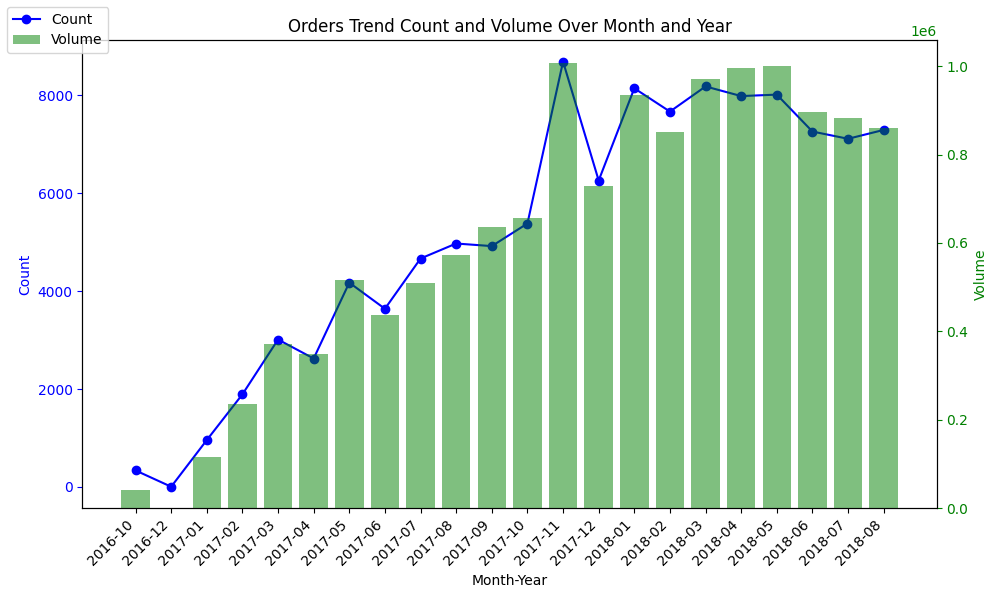

In [8]:
#divide tiemseries into periods(months)
data['order_purchase_month_year'] = data['order_purchase_timestamp'].dt.to_period('M')

#aggregate orders count and volume over months
orders_trend_count = data.groupby('order_purchase_month_year').size().reset_index(name='count')
orders_trend_volume = data['price'].groupby(data['order_purchase_month_year']).sum().reset_index(name='volume')

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot line plot for count
ax1.plot(orders_trend_count['order_purchase_month_year'].astype(str), orders_trend_count['count'], color='blue', marker='o', label='Count')
ax1.set_xlabel('Month-Year')
ax1.set_ylabel('Count', color='blue')
ax1.tick_params('y', colors='blue')
plt.xticks(rotation=45, ha='right')

# Create another y-axis for the bar plot
ax2 = ax1.twinx()
ax2.bar(orders_trend_volume['order_purchase_month_year'].astype(str), orders_trend_volume['volume'], color='green', alpha=0.5, label='Volume')
ax2.set_ylabel('Volume', color='green')
ax2.tick_params('y', colors='green')

# Add legend
fig.legend(loc='upper left')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Title
plt.title('Orders Trend Count and Volume Over Month and Year')

plt.tight_layout()
plt.show()

In [9]:
data=pd.DataFrame(data)
data.head(10) 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_purchase_month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2017-10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2017-10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2017-10
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2017-08
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,ef0996a1a279c26e7ecbd737be23d235,2290,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2017-08
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,e781fdcc107d13d865fc7698711cc572,88032,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2017-10
6,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-25 14:17:55,2017-08-28 20:12:20,2017-09-14,7a1de9bde89aedca8c5fbad489c5571c,1315,...,utilidades_domesticas,59.0,189.0,3.0,775.0,16.0,16.0,13.0,housewares,2017-08
7,1fa40f202d5d233b6491e976c557b822,50fd5707c28d0a64dc20d67f937dd9ba,delivered,2017-09-23 22:11:10,2017-09-23 22:25:11,2017-09-26 17:27:54,2017-10-19 21:09:21,2017-11-13,35c6ec4630637b3ec0da6e587f245f83,69043,...,utilidades_domesticas,59.0,322.0,5.0,600.0,24.0,5.0,18.0,housewares,2017-09
8,41c045db2d1876be9f05cf4a787693b2,a286f46d6e54cc0179bbb0ee07b0df5e,delivered,2017-08-16 14:06:30,2017-08-16 14:55:20,2017-08-18 15:41:40,2017-08-21 15:05:13,2017-08-29,4e4fa2b85379e9db6dc59f873f0a9748,5640,...,utilidades_domesticas,37.0,749.0,4.0,600.0,16.0,6.0,20.0,housewares,2017-08
9,aab7b04f45546e03e7c86b9e8f12368e,23549dc8454087a9e2266d05c5de7602,delivered,2018-02-22 23:12:56,2018-02-24 02:55:41,2018-03-15 01:08:32,2018-04-11 17:51:25,2018-03-22,6a9d8ebad6be7bdae3088a5416e7fe99,65077,...,utilidades_domesticas,60.0,291.0,5.0,225.0,31.0,13.0,28.0,housewares,2018-02


#### 2-Identifing the most popular product and sellers 

In [10]:
# top 10 popular product category
product_pop_count= data.groupby(data['product_category_name_english']).size().sort_values(ascending=False)
product_pop_count.head(10)

product_category_name_english
bed_bath_table           11684
health_beauty             9749
sports_leisure            8734
furniture_decor           8554
computers_accessories     7926
housewares                7154
watches_gifts             6030
telephony                 4578
garden_tools              4451
auto                      4259
dtype: int64

In [11]:
# top 10 popular product category
seller_pop_count= data.groupby(data['seller_id']).size().sort_values(ascending=False)
seller_pop_count.head(10)

seller_id
4a3ca9315b744ce9f8e9374361493884    2093
6560211a19b47992c3666cc44a7e94c0    2076
1f50f920176fa81dab994f9023523100    2003
cc419e0650a3c5ba77189a1882b7556a    1828
da8622b14eb17ae2831f4ac5b9dab84a    1650
955fee9216a65b617aa5c0531780ce60    1492
1025f0e2d44d7041d6cf58b6550e0bfa    1456
7c67e1448b00f6e969d365cea6b010ab    1445
7a67c85e85bb2ce8582c35f2203ad736    1218
ea8482cd71df3c1969d7b9473ff13abc    1217
dtype: int64

#### 3-Inverstigating customer demographics

In [12]:
cust_loc=customers.groupby([customers['customer_city'],customers['customer_state']]).size().sort_values(ascending=False)
cust_loc.head(10)

customer_city          customer_state
sao paulo              SP                15540
rio de janeiro         RJ                 6882
belo horizonte         MG                 2773
brasilia               DF                 2131
curitiba               PR                 1521
campinas               SP                 1444
porto alegre           RS                 1379
salvador               BA                 1245
guarulhos              SP                 1189
sao bernardo do campo  SP                  938
dtype: int64

###### *For EDAs, I prefere using more powerful visualization tool. I will expand more on this section in another file.

### Customer Segmentsation

##### my approch for customer segmentation will be RFM technique (Recency,Frequency, and Monetry value).

In [13]:
# finding the latest purchasing date
purch_max=data['order_purchase_timestamp'].max()

#creating segments dataframe to include all segmentation factors(RFM)
segment=data.groupby(by = 'customer_id', as_index = False).agg({'order_purchase_timestamp':'max','order_id':'count','price':'sum'})

#rename dataframe columns
segment.rename(columns={'order_purchase_timestamp':'latest Purchase',
                        'order_id':'frequency',
                        'price':'total spent'},inplace = True)

#calculating recency
segment['recency']=purch_max-segment['latest Purchase']
#round recency to days
segment['recency']=segment['recency'].dt.round('d')
#converting days into float
segment['recency']=segment['recency']/pd.to_timedelta(1,'D')

#calculating Monetary value(average money spent per purchase)
segment['monetary']=segment['total spent']/segment['frequency']

segment=segment.drop(columns=['total spent'])
segment=segment.drop(columns=['latest Purchase'])

#### segmenting customers depending on each factor alone
###### we will rely on factors visualization for segmentation but surely having business parametars and threshold will make segmentation easier

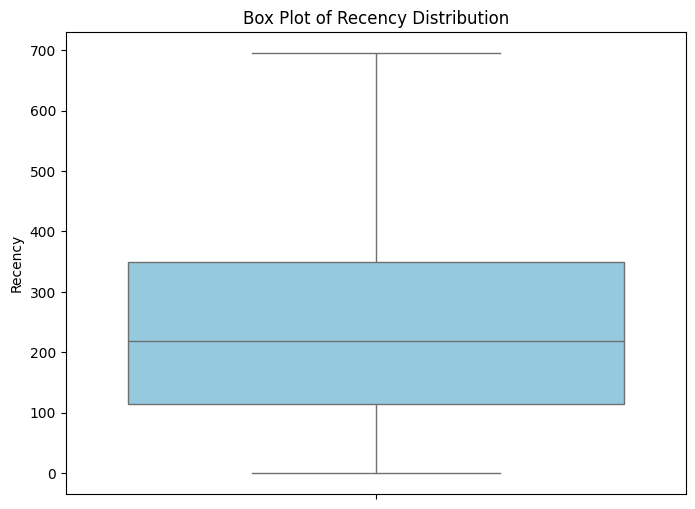

In [14]:
# plotting recency (we will suppose that each quartile represents a segment)
plt.figure(figsize=(8, 6))
sns.boxplot(y=segment['recency'], color='skyblue')
plt.title('Box Plot of Recency Distribution')
plt.ylabel('Recency')
plt.show()

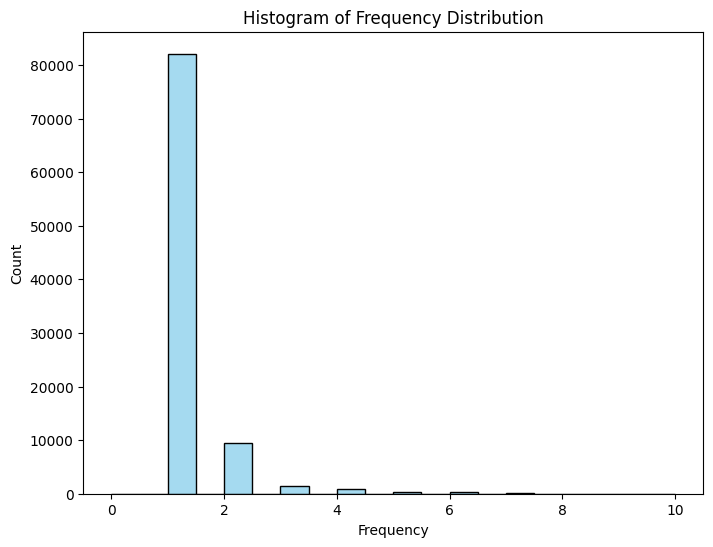

In [15]:
#plotting frequency (the majority segment is 1-time purcahse, 2-time purchase can represent as segment,
# then more than 2-times is concidered a segment)
plt.figure(figsize=(8, 6))
sns.histplot(segment['frequency'], bins=20, color='skyblue',binrange=(0,10))
plt.title('Histogram of Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

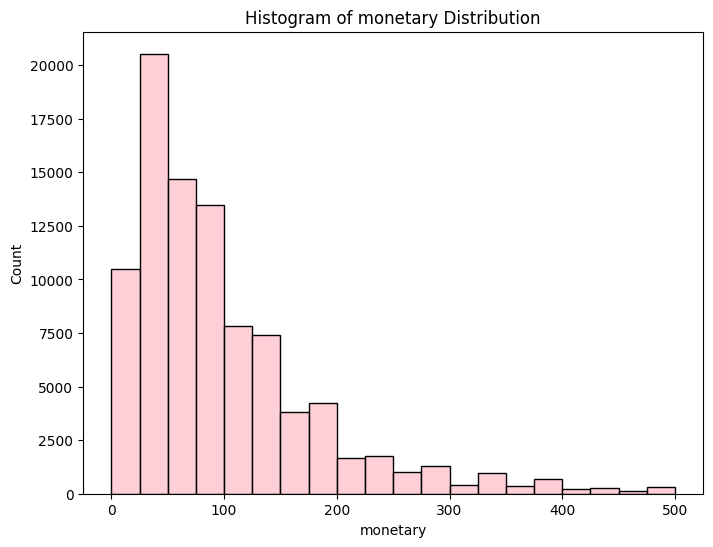

In [16]:
# Plotting monetary value (the best segmentation for monetary is 100,200,300, and >300)

plt.figure(figsize=(8, 6))
sns.histplot(segment['monetary'], bins=20, color='pink',binrange=(0,500))
plt.title('Histogram of monetary Distribution')
plt.xlabel('monetary')
plt.ylabel('Count')
plt.show()

### Churn Analysis

#### Customers Satisfaction

In [49]:
data['late delivery'] = (data['order_delivered_customer_date'] > data['order_estimated_delivery_date']).astype(int)
data['delivery time'] = (data['order_delivered_customer_date'] - data['order_approved_at']).dt.days

#the customer is satisfied if the review score is >=4
data['satisfaction'] = (data['review_score'] >= 4).astype(int)
data_num = data.select_dtypes(include=[np.number])

#exploring factors corelations
corr_factor = data_num.corr()
#factors correlation to satisfaction
# corr_factor['satisfaction'].sort_values(ascending=False)
data_num.describe()

,customer_zip_code_prefix,review_score,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,late delivery,delivery time,satisfaction
count,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.00000,113193.000000
mean,35085.687437,4.082505,1.195065,119.846650,20.002595,1.090818,2.943680,171.557922,24525.441352,48.802894,784.727183,2.206833,2106.236075,30.278091,16.597422,23.099679,0.076984,11.51899,0.768210
std,29867.822574,1.345924,0.687526,181.079901,15.711728,0.686674,2.779181,264.197701,27648.963528,10.016138,650.332251,1.718331,3765.207714,16.145105,13.437427,11.735929,0.266567,9.32641,0.421977
min,1003.000000,1.000000,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1001.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,0.000000,-7.00000,0.000000
25%,11310.000000,4.000000,1.000000,39.900000,13.080000,1.000000,1.000000,60.850000,6429.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,0.000000,6.00000,1.000000
50%,24315.000000,5.000000,1.000000,74.900000,16.320000,1.000000,2.000000,107.960000,13660.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,0.000000,9.00000,1.000000
75%,58865.000000,5.000000,1.000000,132.980000,21.190000,1.000000,4.000000,189.150000,28495.000000,57.000000,982.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,0.000000,15.00000,1.000000
max,99980.000000,5.000000,21.000000,6735.000000,409.680000,26.000000,24.000000,13664.080000,99730.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,1.000000,208.00000,1.000000


##### There is a corelation(threshold=0.5) between satisfaction and the following factors: late delivery, delivery time, order_item_id (item quality), payment_value (item price)

In [31]:
features = corr_factor.index[(corr_factor['satisfaction'].abs() > 0.05) & (corr_factor.index != 'satisfaction')].tolist()
features

['review_score',
 'order_item_id',
 'payment_value',
 'late delivery',
 'delivery time']

### Developing ML model to predict customer satisfaction

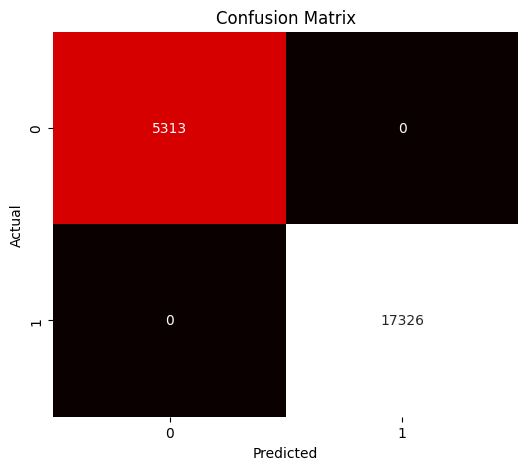

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix


X=data_num[['review_score','order_item_id','payment_value','late delivery','delivery time']]
y=data_num['satisfaction']

#Spliting data to testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

#transforming data into numerics
transformer_num = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('num', transformer_num, features)])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

#selecting an algorithm for traing the model
model=xgb.XGBClassifier(random_state=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='hot', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix')
plt.show()
